In [1]:
# Import packages and implement notebook settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(shuffle = True, random_state = 0)


pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)

%matplotlib inline 

sns.set_theme(style="darkgrid")


# Data Import

In [2]:
import os

current_directory = os.getcwd()

dataframes = ['features.csv', 'features_dum_drop.csv', 'features_dum_nodrop.csv', 'features_encoded.csv',
              'response.csv',
              'X_train_drop.csv', 'X_test_drop.csv', 'y_train_drop.csv', 'y_test_drop.csv',
              'X_train_nodrop.csv', 'X_test_nodrop.csv', 'y_train_nodrop.csv', 'y_test_nodrop.csv',
              'X_train_encoded.csv', 'X_test_encoded.csv', 'y_train_encoded.csv', 'y_test_encoded.csv',
              'X_train_drop_scaled.csv', 'X_test_drop_scaled.csv',
              'X_train_nodrop_scaled.csv', 'X_test_nodrop_scaled.csv']

loaded_dataframes = {}

for file_name in dataframes:
    
    df_name = file_name.split('.csv')[0]
    file_path = os.path.join(current_directory, file_name)
    loaded_dataframes[df_name] = pd.read_csv(file_path, sep='\t')



In [3]:
features = loaded_dataframes['features']
features_dum_drop = loaded_dataframes['features_dum_drop']
features_dum_nodrop = loaded_dataframes['features_dum_nodrop']
features_encoded = loaded_dataframes['features_encoded']

response = loaded_dataframes['response']


X_train_drop_scaled = loaded_dataframes['X_train_drop_scaled']
X_test_drop_scaled = loaded_dataframes['X_test_drop_scaled']
y_train_drop_scaled = loaded_dataframes['y_train_drop']['SalePrice']
y_test_drop_scaled = loaded_dataframes['y_test_drop']['SalePrice']

X_train_nodrop_scaled = loaded_dataframes['X_train_nodrop_scaled']
X_test_nodrop_scaled = loaded_dataframes['X_test_nodrop_scaled']
y_train_nodrop_scaled = loaded_dataframes['y_train_nodrop']['SalePrice']
y_test_nodrop_scaled = loaded_dataframes['y_test_nodrop']['SalePrice']

# Penalized Linear Regression

## Ridge - With Drop - Scaled - Base Model


In [4]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state = 0)

ridge.fit(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))

print('Best train score: ' + str(ridge.score(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))))
print('Best test score: ' + str(ridge.score(X = X_test_drop_scaled,y = np.log(y_test_drop_scaled))))


Best train score: 0.9463994303167017
Best test score: 0.9244200289229986


In [5]:
ridge_drop_scaled_train_test_score = pd.DataFrame({'Model': ['Ridge Penalized Regression_Drop_Scaled'],
              'Train Score': [ridge.score(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))],
              'Test Score': [ridge.score(X = X_test_drop_scaled,y = np.log(y_test_drop_scaled))]
             })
ridge_drop_scaled_train_test_score

,Model,Train Score,Test Score
0,Ridge Penalized Regression_Drop_Scaled,0.946399,0.92442


Text(0, 0.5, 'Actual SalePrice')

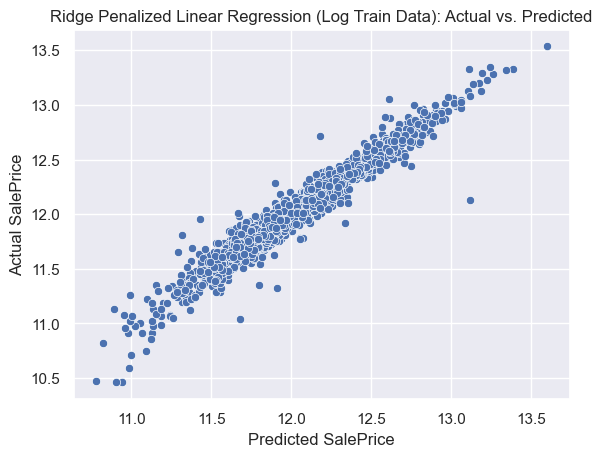

In [6]:
sns.scatterplot(x = ridge.predict(X_train_drop_scaled), y = np.log(y_train_drop_scaled))
plt.title('Ridge Penalized Linear Regression (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

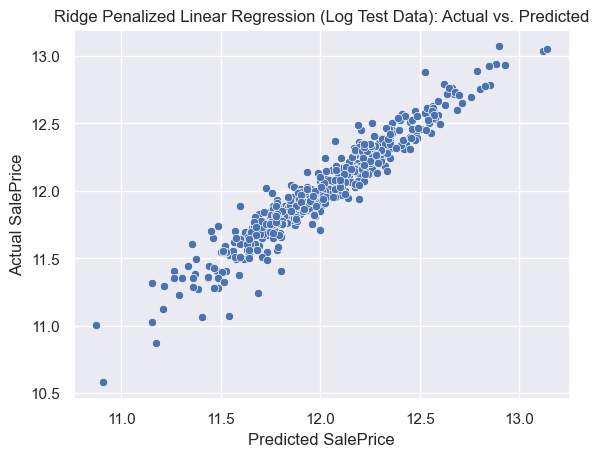

In [7]:
sns.scatterplot(x = ridge.predict(X_test_drop_scaled), y = np.log(y_test_drop_scaled))
plt.title('Ridge Penalized Linear Regression (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Ridge - With Drop - Scaled - Cross Validation

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ridge = Ridge(random_state = 0)

pipe = Pipeline([('scaler',scaler),('model',ridge)])

ridge_drop_scaled_cv = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'r2')


In [9]:
print('Mean cross-validation score: ' + str(ridge_drop_scaled_cv.mean()))
print('Std dev cross-validation score: ' + str(ridge_drop_scaled_cv.std()))

Mean cross-validation score: 0.9134489986407941
Std dev cross-validation score: 0.01721859674078365


## Ridge - With Drop - Scaled - Hyperparameter Tuning


In [10]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge(random_state = 0)

grid = {'alpha': np.linspace(0.001, 1000, 40)}

gsCV = GridSearchCV(ridge, grid, cv = kf, return_train_score=True, n_jobs=-1)
gsCV.fit(X_train_drop_scaled, np.log(y_train_drop_scaled))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Ridge(random_state=0), n_jobs=-1,
             param_grid={'alpha': array([1.00000e-03, 2.56420e+01, 5.12830e+01, 7.69240e+01, 1.02565e+02,
       1.28206e+02, 1.53847e+02, 1.79488e+02, 2.05129e+02, 2.30770e+02,
       2.56411e+02, 2.82052e+02, 3.07693e+02, 3.33334e+02, 3.58975e+02,
       3.84616e+02, 4.10257e+02, 4.35898e+02, 4.61539e+02, 4.87180e+02,
       5.12821e+02, 5.38462e+02, 5.64103e+02, 5.89744e+02, 6.15385e+02,
       6.41026e+02, 6.66667e+02, 6.92308e+02, 7.17949e+02, 7.43590e+02,
       7.69231e+02, 7.94872e+02, 8.20513e+02, 8.46154e+02, 8.71795e+02,
       8.97436e+02, 9.23077e+02, 9.48718e+02, 9.74359e+02, 1.00000e+03])},
             return_train_score=True)

In [11]:
gsCV_ridge_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_ridge_train_vs_test_df['model_number'] = gsCV_ridge_train_vs_test_df['model_number'] + 1
gsCV_ridge_train_vs_test_df['score_difference'] = gsCV_ridge_train_vs_test_df['train_score'] - gsCV_ridge_train_vs_test_df['test_score']

gsCV_ridge_train_vs_test_df = gsCV_ridge_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_ridge_train_vs_test_df.head()


,model_number,score_difference,score_type,score
0,1,0.061273,train_score,0.949658
1,2,0.040649,train_score,0.948945
2,3,0.038886,train_score,0.948415
3,4,0.037609,train_score,0.947924
4,5,0.036548,train_score,0.947447


<Axes: xlabel='model_number', ylabel='score'>

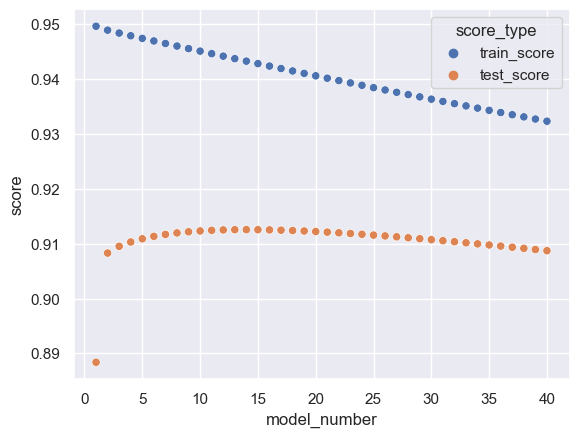

In [12]:
sns.scatterplot(data = gsCV_ridge_train_vs_test_df, y = 'score', x = 'model_number', hue = 'score_type')

In [13]:
print('Best estimators: ' + str(gsCV.best_estimator_))
print('Best score: ' + str(gsCV.best_score_))

Best estimators: Ridge(alpha=333.334, random_state=0)
Best score: 0.9125675352177833


In [14]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

# Assuming 'X' is your feature matrix and 'y' is your target variable

ridge_cv = RidgeCV(alphas = [0.1, 1.0, 10,125, 130, 135,140, 150,160, 175, 200, 250, 275, 300, 325, 340, 345, 350, 355, 360, 375, 400, 1000])

scaler = StandardScaler()

model_pipeline = Pipeline([('scaler', scaler), ('ridge_cv', ridge_cv)])
# Perform cross-validation

cv_models = []

for train_index, test_index in kf.split(features_dum_drop):
    X_train, X_test = features_dum_drop.iloc[train_index,:], features_dum_drop.iloc[test_index,:]
    y_train, y_test = response.iloc[train_index], response.iloc[test_index]
    # Fit the pipeline on the training data
    model_pipeline.fit(X_train, np.log(y_train))
    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)
    # Calculate R-squared for the fold
    r2 = r2_score(np.log(y_test), y_pred)
    # Append the fitted model and R-squared to the list
    cv_models.append((model_pipeline.named_steps['ridge_cv'], r2))
# Access the optimal alpha and R-squared for each fold
optimal_alphas = [model[0].alpha_ for model in cv_models]
r2_scores = [model[1] for model in cv_models]
# Print the optimal alphas and R-squared for each fold
for fold, (alpha, r2) in enumerate(zip(optimal_alphas, r2_scores), 1):
    print(f"Fold {fold}: Optimal alpha = {alpha}, R-squared = {r2}")
print()
print(sum(r2_scores)/len(r2_scores))

Fold 1: Optimal alpha = 350.0, R-squared = 0.9234518300435116
Fold 2: Optimal alpha = 350.0, R-squared = 0.8912028367690865
Fold 3: Optimal alpha = 350.0, R-squared = 0.9367990572879461
Fold 4: Optimal alpha = 350.0, R-squared = 0.929093590489552
Fold 5: Optimal alpha = 350.0, R-squared = 0.8995811052502574

0.9160256839680706


In [38]:
ridge.set_params(alpha = 350.0, random_state = 0)
ridge.fit(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))
print('Best train score: ' + str(ridge.score(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))))
print('Best test score: ' + str(ridge.score(X = X_test_drop_scaled,y = np.log(y_test_drop_scaled))))

Best train score: 0.9412919834143183
Best test score: 0.9227715451855736


In [39]:
ridge_drop_scaled_tuned_train_test_score = pd.DataFrame({'Model': ['Ridge Penalized Regression_Drop_Scaled_Tuned'],
              'Train Score': [ridge.score(X = X_train_drop_scaled,y = np.log(y_train_drop_scaled))],
              'Test Score': [ridge.score(X = X_test_drop_scaled,y = np.log(y_test_drop_scaled))]
             })
ridge_drop_scaled_tuned_train_test_score

,Model,Train Score,Test Score
0,Ridge Penalized Regression_Drop_Scaled_Tuned,0.941292,0.922772


## Ridge - With Drop - Scaled - Post Tuning - Cross Validation

In [40]:

scaler = StandardScaler()

ridge = Ridge(random_state = 0, alpha = 350.0)

pipe = Pipeline([('scaler',scaler),('model',ridge)])

ridge_drop_scaled_cv_tuned = cross_val_score(estimator = pipe, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'r2')


In [41]:
print('Mean cross-validation score: ' + str(ridge_drop_scaled_cv_tuned.mean()))
print('Std dev cross-validation score: ' + str(ridge_drop_scaled_cv_tuned.std()))

Mean cross-validation score: 0.9159485097035622
Std dev cross-validation score: 0.017781794168934464


## Ridge - Without Drop - Base Model


In [19]:

ridge = Ridge(random_state = 0)

ridge.fit(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))

print('Best train score: ' + str(ridge.score(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))))
print('Best test score: ' + str(ridge.score(X = X_test_nodrop_scaled,y = np.log(y_test_nodrop_scaled))))


Best train score: 0.9464135487720151
Best test score: 0.9242076623246671


In [20]:
ridge_nodrop_scaled_train_test_score = pd.DataFrame({'Model': ['Ridge Penalized Regression_NoDrop_Scaled'],
              'Train Score': [ridge.score(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))],
              'Test Score': [ridge.score(X = X_test_nodrop_scaled,y = np.log(y_test_nodrop_scaled))]
             })
ridge_nodrop_scaled_train_test_score

,Model,Train Score,Test Score
0,Ridge Penalized Regression_NoDrop_Scaled,0.946414,0.924208


Text(0, 0.5, 'Actual SalePrice')

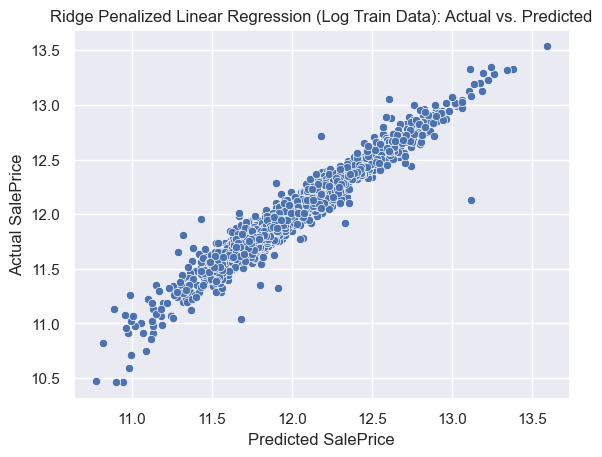

In [21]:
sns.scatterplot(x = ridge.predict(X_train_nodrop_scaled), y = np.log(y_train_nodrop_scaled))
plt.title('Ridge Penalized Linear Regression (Log Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

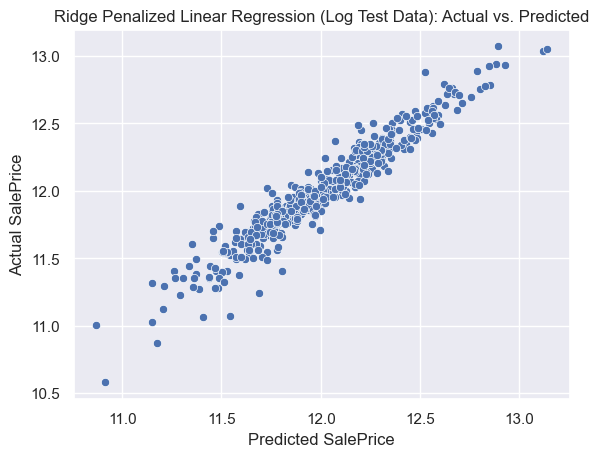

In [22]:
sns.scatterplot(x = ridge.predict(X_test_nodrop_scaled), y = np.log(y_test_nodrop_scaled))
plt.title('Ridge Penalized Linear Regression (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Ridge - Without Drop - Cross Validation


In [23]:

scaler = StandardScaler()

ridge = Ridge(random_state = 0)

pipe = Pipeline([('scaler',scaler),('model',ridge)])

ridge_nodrop_scaled_cv = cross_val_score(estimator = pipe, X = features_dum_nodrop, y = np.log(response), cv = kf, scoring = 'r2')


In [24]:
print('Mean cross-validation score: ' + str(ridge_nodrop_scaled_cv.mean()))
print('Std dev cross-validation score: ' + str(ridge_nodrop_scaled_cv.std()))

Mean cross-validation score: 0.9136186366088364
Std dev cross-validation score: 0.017380179533058166


## Ridge - Without Drop - Hyperparameter Tuning


In [25]:
ridge = Ridge(random_state = 0)

grid = {'alpha': np.linspace(0.001, 1000, 40)}

gsCV = GridSearchCV(ridge, grid, cv = kf, return_train_score=True, n_jobs=-1)
gsCV.fit(X_train_nodrop_scaled, np.log(y_train_nodrop_scaled))


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Ridge(random_state=0), n_jobs=-1,
             param_grid={'alpha': array([1.00000e-03, 2.56420e+01, 5.12830e+01, 7.69240e+01, 1.02565e+02,
       1.28206e+02, 1.53847e+02, 1.79488e+02, 2.05129e+02, 2.30770e+02,
       2.56411e+02, 2.82052e+02, 3.07693e+02, 3.33334e+02, 3.58975e+02,
       3.84616e+02, 4.10257e+02, 4.35898e+02, 4.61539e+02, 4.87180e+02,
       5.12821e+02, 5.38462e+02, 5.64103e+02, 5.89744e+02, 6.15385e+02,
       6.41026e+02, 6.66667e+02, 6.92308e+02, 7.17949e+02, 7.43590e+02,
       7.69231e+02, 7.94872e+02, 8.20513e+02, 8.46154e+02, 8.71795e+02,
       8.97436e+02, 9.23077e+02, 9.48718e+02, 9.74359e+02, 1.00000e+03])},
             return_train_score=True)

In [26]:
gsCV_ridge_train_vs_test_df = pd.DataFrame(data = {'train_score': gsCV.cv_results_['mean_train_score'],\
                                               'test_score': gsCV.cv_results_['mean_test_score']}).reset_index().rename(columns = {'index': 'model_number'})
gsCV_ridge_train_vs_test_df['model_number'] = gsCV_ridge_train_vs_test_df['model_number'] + 1
gsCV_ridge_train_vs_test_df['score_difference'] = gsCV_ridge_train_vs_test_df['train_score'] - gsCV_ridge_train_vs_test_df['test_score']

gsCV_ridge_train_vs_test_df = gsCV_ridge_train_vs_test_df.melt(id_vars = ['model_number','score_difference'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

gsCV_ridge_train_vs_test_df.head()


,model_number,score_difference,score_type,score
0,1,0.061658,train_score,0.949658
1,2,0.042554,train_score,0.949419
2,3,0.040688,train_score,0.949146
3,4,0.039316,train_score,0.948847
4,5,0.038173,train_score,0.948530


<Axes: xlabel='model_number', ylabel='score'>

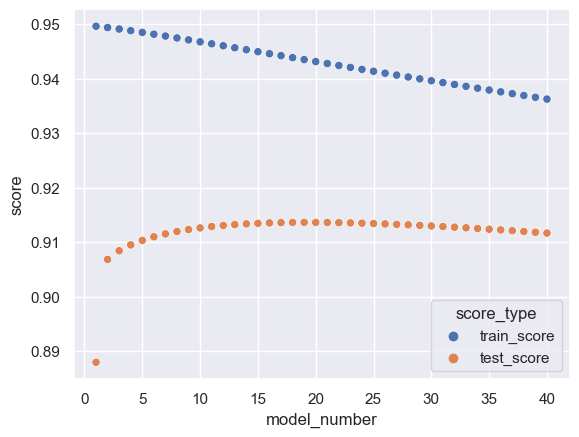

In [27]:
sns.scatterplot(data = gsCV_ridge_train_vs_test_df, y = 'score', x = 'model_number', hue = 'score_type')

In [28]:
print('Best estimators: ' + str(gsCV.best_estimator_))
print('Best score: ' + str(gsCV.best_score_))

Best estimators: Ridge(alpha=461.539, random_state=0)
Best score: 0.9136656074826103


In [29]:

# Assuming 'X' is your feature matrix and 'y' is your target variable

ridge_cv = RidgeCV(alphas = [0.1, 1.0, 10, 100, 150,190,200, 205,250, 275, 300, 325, 340, 345, 350, 360, 375, 400, 425, 450,455, 465, 500, 550, 590,600,610, 615,620,650, 700, 1000])

scaler = StandardScaler()

model_pipeline = Pipeline([('scaler', scaler), ('ridge_cv', ridge_cv)])
# Perform cross-validation

cv_models = []

for train_index, test_index in kf.split(features_dum_nodrop):
    X_train, X_test = features_dum_nodrop.iloc[train_index,:], features_dum_nodrop.iloc[test_index,:]
    y_train, y_test = response.iloc[train_index], response.iloc[test_index]
    # Fit the pipeline on the training data
    model_pipeline.fit(X_train, np.log(y_train))
    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)
    # Calculate R-squared for the fold
    r2 = r2_score(np.log(y_test), y_pred)
    # Append the fitted model and R-squared to the list
    cv_models.append((model_pipeline.named_steps['ridge_cv'], r2))
# Access the optimal alpha and R-squared for each fold
optimal_alphas = [model[0].alpha_ for model in cv_models]
r2_scores = [model[1] for model in cv_models]
# Print the optimal alphas and R-squared for each fold
for fold, (alpha, r2) in enumerate(zip(optimal_alphas, r2_scores), 1):
    print(f"Fold {fold}: Optimal alpha = {alpha}, R-squared = {r2}")
print()
print(sum(r2_scores)/len(r2_scores))

Fold 1: Optimal alpha = 450.0, R-squared = 0.9205207251517039
Fold 2: Optimal alpha = 450.0, R-squared = 0.8923954828981946
Fold 3: Optimal alpha = 450.0, R-squared = 0.9359159915291568
Fold 4: Optimal alpha = 450.0, R-squared = 0.9292298419033326
Fold 5: Optimal alpha = 450.0, R-squared = 0.9034720508857971

0.9163068184736372


In [42]:
ridge.set_params(alpha = 450.0, random_state = 0)
ridge.fit(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))
print('Best train score: ' + str(ridge.score(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))))
print('Best test score: ' + str(ridge.score(X = X_test_nodrop_scaled,y = np.log(y_test_nodrop_scaled))))

Best train score: 0.9420311349863499
Best test score: 0.920520725151662


In [43]:
ridge_nodrop_scaled_tuned_train_test_score = pd.DataFrame({'Model': ['Ridge Penalized Regression_NoDrop_Scaled_Tuned'],
              'Train Score': [ridge.score(X = X_train_nodrop_scaled,y = np.log(y_train_nodrop_scaled))],
              'Test Score': [ridge.score(X = X_test_nodrop_scaled,y = np.log(y_test_nodrop_scaled))]
             })
ridge_nodrop_scaled_tuned_train_test_score

,Model,Train Score,Test Score
0,Ridge Penalized Regression_NoDrop_Scaled_Tuned,0.942031,0.920521


## Ridge - Without Drop - Post Tuning - Cross Validation


In [44]:

scaler = StandardScaler()

ridge = Ridge(random_state = 0, alpha = 450.0)

pipe = Pipeline([('scaler',scaler),('model',ridge)])

ridge_nodrop_scaled_cv_tuned = cross_val_score(estimator = pipe, X = features_dum_nodrop, y = np.log(response), cv = kf, scoring = 'r2')


In [45]:
print('Mean cross-validation score: ' + str(ridge_nodrop_scaled_cv_tuned.mean()))
print('Std dev cross-validation score: ' + str(ridge_nodrop_scaled_cv_tuned.std()))

Mean cross-validation score: 0.9166474257136988
Std dev cross-validation score: 0.01616412080754067


# Model Results Export

In [46]:
ridge_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                      'Ridge Penalized Regression_Drop_Scaled': ridge_drop_scaled_cv,
                                      'Ridge Penalized Regression_Drop_Scaled_Tuned': ridge_drop_scaled_cv_tuned,
                                      'Ridge Penalized Regression_NoDrop_Scaled': ridge_nodrop_scaled_cv,
                                      'Ridge Penalized Regression_NoDrop_Scaled_Tuned': ridge_nodrop_scaled_cv_tuned
                                     }
                             )

ridge_results

,Model Number,Ridge Penalized Regression_Drop_Scaled,Ridge Penalized Regression_Drop_Scaled_Tuned,Ridge Penalized Regression_NoDrop_Scaled,Ridge Penalized Regression_NoDrop_Scaled_Tuned
0,1.0,0.924420,0.922772,0.924208,0.920521
1,2.0,0.887339,0.890802,0.887016,0.893011
2,3.0,0.930153,0.937321,0.930759,0.935999
3,4.0,0.926810,0.929267,0.927128,0.930235
4,5.0,0.898524,0.899581,0.898982,0.903472


In [47]:
ridge_train_test_score = pd.concat([ridge_drop_scaled_train_test_score,
           ridge_drop_scaled_tuned_train_test_score,
           ridge_nodrop_scaled_train_test_score,
           ridge_nodrop_scaled_tuned_train_test_score
          ])
ridge_train_test_score

,Model,Train Score,Test Score
0,Ridge Penalized Regression_Drop_Scaled,0.946399,0.924420
0,Ridge Penalized Regression_Drop_Scaled_Tuned,0.941292,0.922772
0,Ridge Penalized Regression_NoDrop_Scaled,0.946414,0.924208
0,Ridge Penalized Regression_NoDrop_Scaled_Tuned,0.942031,0.920521


In [48]:

current_directory = os.getcwd()

dataframes = {'ridge_results': ridge_results,
             'ridge_train_test_score': ridge_train_test_score
             }


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    df.to_csv(file_path, sep='\t', index=False)